In [1]:
#Belen Del Rosario Benito Tecuautzin

#importamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Cargamos todo los archivos
#Cargar el documento1
D1 = pd.read_csv('sims_All_Genomes_13V_0_536.txt',sep=',',header=None, engine='python')
D1 = D1.drop(range(500,536))
#Cargar el documento2
D2 = pd.read_table('sims_All_Genomes_13V_500_800.txt',sep=',',header=None, engine='python')
D2 = D2.drop(range(300,323))
#Cargar el documento3
D3 = pd.read_csv('sims_All_Genomes_13V_800_1300.txt',sep=',',header=None, engine='python')
D3 = D3.drop(range(500,509))
#Cargar el documento4
D4 = pd.read_csv('sims_All_Genomes_13V_1300_2000.txt',sep=',',header=None, engine='python')
D4 = D4.drop(range(700,740))
#Cargar el documento5
D5 = pd.read_csv('sims_All_Genomes_13V_2000_2350.txt',sep=',',header=None, engine='python')
D5 = D5.drop(range(350,395))
#Cargar el documento5
D6 = pd.read_csv('sims_All_Genomes_13V_2350_3222.txt',sep=',',header=None, engine='python')


In [3]:
#Concatenamos todos los documentos
Ju=pd.concat([D1,D2,D3,D4,D5,D6])
#Visualizamos la matriz
Ju.head(3222)


,0,1,2,3,4,5,6,7,8,9,...,3211,3212,3213,3214,3215,3216,3217,3218,3219,3220
0,0.000016,0.000004,1.820420e-05,0.000016,0.000005,0.004489,0.000007,0.438905,0.444450,0.450203,...,0.447905,0.448444,0.447949,0.447964,0.448927,0.445895,0.453676,0.467578,0.434754,0.44857
1,0.000012,0.000002,4.023710e-07,0.000011,0.004468,0.000009,0.439023,0.444455,0.450205,0.443552,...,0.448449,0.447953,0.447968,0.448931,0.445902,0.453681,0.467579,0.434756,0.448574,NaN
2,0.000014,0.000012,1.062600e-06,0.004487,0.000003,0.438955,0.444464,0.450212,0.443550,0.443086,...,0.447953,0.447968,0.448927,0.445901,0.453679,0.467579,0.434764,0.448575,NaN,NaN
3,0.000001,0.000013,4.466020e-03,0.000011,0.439023,0.444456,0.450205,0.443553,0.443085,0.415969,...,0.447968,0.448931,0.445902,0.453682,0.467579,0.434756,0.448574,NaN,NaN,NaN
4,0.000012,0.004468,9.534000e-06,0.439023,0.444455,0.450205,0.443551,0.443084,0.415967,0.449071,...,0.448931,0.445902,0.453681,0.467579,0.434756,0.448574,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,0.408373,0.425185,4.082080e-01,0.430965,0.186768,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
867,0.423528,0.406570,4.278330e-01,0.414146,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868,0.425409,0.433879,4.172700e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
869,0.464967,0.400860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Agregamos una fila 
fila = []
fila.append(None)
Ju = Ju.append(fila,ignore_index=True)
# Agregamos una columna
Ju['3221']=np.nan

In [5]:
#Agregamos la diagonal de 1 
for i in range(0,3222):
  Ju.iat[i,3221-i] = 1

In [6]:
#Visualizamos los datos
Ju.head(3222)

,0,1,2,3,4,5,6,7,8,9,...,3212,3213,3214,3215,3216,3217,3218,3219,3220,3221
0,0.000016,0.000004,1.820420e-05,0.000016,0.000005,0.004489,0.000007,0.438905,0.444450,0.450203,...,0.448444,0.447949,0.447964,0.448927,0.445895,0.453676,0.467578,0.434754,0.44857,1.0
1,0.000012,0.000002,4.023710e-07,0.000011,0.004468,0.000009,0.439023,0.444455,0.450205,0.443552,...,0.447953,0.447968,0.448931,0.445902,0.453681,0.467579,0.434756,0.448574,1.00000,NaN
2,0.000014,0.000012,1.062600e-06,0.004487,0.000003,0.438955,0.444464,0.450212,0.443550,0.443086,...,0.447968,0.448927,0.445901,0.453679,0.467579,0.434764,0.448575,1.000000,NaN,NaN
3,0.000001,0.000013,4.466020e-03,0.000011,0.439023,0.444456,0.450205,0.443553,0.443085,0.415969,...,0.448931,0.445902,0.453682,0.467579,0.434756,0.448574,1.000000,NaN,NaN,NaN
4,0.000012,0.004468,9.534000e-06,0.439023,0.444455,0.450205,0.443551,0.443084,0.415967,0.449071,...,0.445902,0.453681,0.467579,0.434756,0.448574,1.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0.423528,0.406570,4.278330e-01,0.414146,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3218,0.425409,0.433879,4.172700e-01,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,0.464967,0.400860,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3220,0.433332,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
matrizI = Ju.copy()
# Invertimos los datos de la matriz
for i in range (3222):
  for j in range(3222):
    matrizI.iat[i,j] = Ju.iat[i,3221-j]

In [8]:
#Visualizamos la matriz
matrizI.head(3222)

,0,1,2,3,4,5,6,7,8,9,...,3212,3213,3214,3215,3216,3217,3218,3219,3220,3221
0,1.0,0.44857,0.434754,0.467578,0.453676,0.445895,0.448927,0.447964,0.447949,0.448444,...,0.450203,0.444450,0.438905,0.000007,0.004489,0.000005,0.000016,1.820420e-05,0.000004,0.000016
1,NaN,1.00000,0.448574,0.434756,0.467579,0.453681,0.445902,0.448931,0.447968,0.447953,...,0.443552,0.450205,0.444455,0.439023,0.000009,0.004468,0.000011,4.023710e-07,0.000002,0.000012
2,NaN,NaN,1.000000,0.448575,0.434764,0.467579,0.453679,0.445901,0.448927,0.447968,...,0.443086,0.443550,0.450212,0.444464,0.438955,0.000003,0.004487,1.062600e-06,0.000012,0.000014
3,NaN,NaN,NaN,1.000000,0.448574,0.434756,0.467579,0.453682,0.445902,0.448931,...,0.415969,0.443085,0.443553,0.450205,0.444456,0.439023,0.000011,4.466020e-03,0.000013,0.000001
4,NaN,NaN,NaN,NaN,1.000000,0.448574,0.434756,0.467579,0.453681,0.445902,...,0.449071,0.415967,0.443084,0.443551,0.450205,0.444455,0.439023,9.534000e-06,0.004468,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.414146,4.278330e-01,0.406570,0.423528
3218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.172700e-01,0.433879,0.425409
3219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.400860,0.464967
3220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.433332


In [9]:
#Realizamos la matriz transpuesta
MatrizT = matrizI.transpose()
MatrizF = matrizI.copy()
for i in range(0,3222):
   for j in range(0,i):
     MatrizF.iat[i,j] = MatrizT.iat[i,j]

In [10]:
#Visualizamos la matriz
MatrizF.head(3222)

,0,1,2,3,4,5,6,7,8,9,...,3212,3213,3214,3215,3216,3217,3218,3219,3220,3221
0,1.000000,4.485700e-01,0.434754,0.467578,0.453676,0.445895,0.448927,0.447964,0.447949,0.448444,...,0.450203,0.444450,0.438905,0.000007,0.004489,0.000005,0.000016,1.820420e-05,0.000004,0.000016
1,0.448570,1.000000e+00,0.448574,0.434756,0.467579,0.453681,0.445902,0.448931,0.447968,0.447953,...,0.443552,0.450205,0.444455,0.439023,0.000009,0.004468,0.000011,4.023710e-07,0.000002,0.000012
2,0.434754,4.485740e-01,1.000000,0.448575,0.434764,0.467579,0.453679,0.445901,0.448927,0.447968,...,0.443086,0.443550,0.450212,0.444464,0.438955,0.000003,0.004487,1.062600e-06,0.000012,0.000014
3,0.467578,4.347560e-01,0.448575,1.000000,0.448574,0.434756,0.467579,0.453682,0.445902,0.448931,...,0.415969,0.443085,0.443553,0.450205,0.444456,0.439023,0.000011,4.466020e-03,0.000013,0.000001
4,0.453676,4.675790e-01,0.434764,0.448574,1.000000,0.448574,0.434756,0.467579,0.453681,0.445902,...,0.449071,0.415967,0.443084,0.443551,0.450205,0.444455,0.439023,9.534000e-06,0.004468,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0.000005,4.468280e-03,0.000003,0.439023,0.444455,0.450220,0.444144,0.443100,0.412842,0.404495,...,0.414789,0.421303,0.400933,0.432614,0.186768,1.000000,0.414146,4.278330e-01,0.406570,0.423528
3218,0.000016,1.116220e-05,0.004487,0.000011,0.439023,0.444469,0.450805,0.443565,0.390429,0.420374,...,0.409890,0.415163,0.420574,0.401034,0.430965,0.414146,1.000000,4.172700e-01,0.433879,0.425409
3219,0.000018,4.023710e-07,0.000001,0.004466,0.000010,0.438962,0.445161,0.450218,0.391770,0.405413,...,0.007877,0.410286,0.414791,0.420607,0.408208,0.427833,0.417270,1.000000e+00,0.400860,0.464967
3220,0.000004,1.932330e-06,0.000012,0.000013,0.004468,0.000001,0.439978,0.444468,0.395395,0.405928,...,0.007734,0.011651,0.409990,0.414799,0.425185,0.406570,0.433879,4.008600e-01,1.000000,0.433332


In [11]:
#Agregamos los kmeans a la matriz final
#KMeans = 71
MatrizF_copia = pd.DataFrame(data = MatrizF)
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters = 71, max_iter = 300)
cluster.fit(MatrizF_copia)
MatrizF_copia['k_means'] = cluster.labels_


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [12]:
#Visualizar
MatrizF_copia.head(3222)

,0,1,2,3,4,5,6,7,8,9,...,3213,3214,3215,3216,3217,3218,3219,3220,3221,k_means
0,1.000000,4.485700e-01,0.434754,0.467578,0.453676,0.445895,0.448927,0.447964,0.447949,0.448444,...,0.444450,0.438905,0.000007,0.004489,0.000005,0.000016,1.820420e-05,0.000004,0.000016,11
1,0.448570,1.000000e+00,0.448574,0.434756,0.467579,0.453681,0.445902,0.448931,0.447968,0.447953,...,0.450205,0.444455,0.439023,0.000009,0.004468,0.000011,4.023710e-07,0.000002,0.000012,11
2,0.434754,4.485740e-01,1.000000,0.448575,0.434764,0.467579,0.453679,0.445901,0.448927,0.447968,...,0.443550,0.450212,0.444464,0.438955,0.000003,0.004487,1.062600e-06,0.000012,0.000014,11
3,0.467578,4.347560e-01,0.448575,1.000000,0.448574,0.434756,0.467579,0.453682,0.445902,0.448931,...,0.443085,0.443553,0.450205,0.444456,0.439023,0.000011,4.466020e-03,0.000013,0.000001,11
4,0.453676,4.675790e-01,0.434764,0.448574,1.000000,0.448574,0.434756,0.467579,0.453681,0.445902,...,0.415967,0.443084,0.443551,0.450205,0.444455,0.439023,9.534000e-06,0.004468,0.000012,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0.000005,4.468280e-03,0.000003,0.439023,0.444455,0.450220,0.444144,0.443100,0.412842,0.404495,...,0.421303,0.400933,0.432614,0.186768,1.000000,0.414146,4.278330e-01,0.406570,0.423528,35
3218,0.000016,1.116220e-05,0.004487,0.000011,0.439023,0.444469,0.450805,0.443565,0.390429,0.420374,...,0.415163,0.420574,0.401034,0.430965,0.414146,1.000000,4.172700e-01,0.433879,0.425409,35
3219,0.000018,4.023710e-07,0.000001,0.004466,0.000010,0.438962,0.445161,0.450218,0.391770,0.405413,...,0.410286,0.414791,0.420607,0.408208,0.427833,0.417270,1.000000e+00,0.400860,0.464967,35
3220,0.000004,1.932330e-06,0.000012,0.000013,0.004468,0.000001,0.439978,0.444468,0.395395,0.405928,...,0.011651,0.409990,0.414799,0.425185,0.406570,0.433879,4.008600e-01,1.000000,0.433332,35


In [13]:
#Abrimos archivo group family para gráficar
gráfica = pd.read_csv('groupOrderFamilySlop.txt',sep=',',header=None, engine='python')
gráfica.head(72)

,0,1,2
0,Actinobacteria,Bifidobacteriales,76
1,Actinobacteria,Micrococcales,92
2,Actinobacteria,Streptomycetales,79
3,Actinobacteria,Micromonosporales,10
4,Actinobacteria,Pseudonocardiales,26
...,...,...,...
67,Thermotogales,Thermotogaceae,20
68,Thiotrichales,Piscirickettsiaceae,24
69,Thiotrichales,Francisellaceae,61
70,Vibrionales,Vibrionaceae,121


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


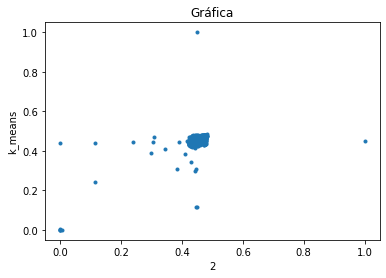

In [14]:
#Gráfica1
#importamos las librerías a usar
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#utilizamos los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(MatrizF_copia,gráfica)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {1: 'k_means', 2: '2'})
x = df_escalado['k_means'].values
y = df_escalado['2'].values
plt.xlabel('2')
plt.ylabel('k_means')
plt.title('Gráfica')
plt.plot(x,y,'o',markersize=3)

In [15]:
#Gráfica 2
#Definimos las variables y los convertimos a Dataframe
nodos = pd.DataFrame( data = np.arange(0,72))
familias = pd.DataFrame( data = gráfica[1])
value = pd.DataFrame( data = gráfica[2])
k_means = pd.DataFrame(data = np.zeros(72))
clusters =  pd.DataFrame( data = np.arange(0,3222))

In [16]:
#ciclos para realizar los contadores de kmeans y cluster
indice = 0
for i in range(72):
    for n in range(gráfica.iat[i,2]):
        clusters.iat[indice,0] = gráfica.iat[i,1]
        indice = indice + 1
        contador = 0
for i in range(3222):
    num = clusters.iat[i,0]
    num_ant = clusters.iat[i-1,0]
    if(num != num_ant):
        num_clasificados = MatrizF_copia.at[i,'k_means']
        k_means.at[contador] = num_clasificados
        contador = contador + 1

In [17]:
#ciclo para k means
k_means = pd.DataFrame( data = k_means)
for i in range(72):
    k_means.iat[i, 0] = k_means.iat[i,0] + 72

In [18]:
#Asignamos las variables familias, nodos, k_means y value para la gráfica
node = dict(label = familias[1], pad = 8,  thickness = 10)
link = dict(source = nodos[0], target = k_means[0], value = value[2] )

In [20]:
#importamos la librería a utilizar y asignamos las variables para visualizar la gráfica
import plotly.graph_objects as go 
plot = go.Figure(go.Sankey( 
    node = node,
    link = link))  #definimos el tamaño
plot.update_layout(height=1300,
                   width=1300,
                   #asignamos los colores y tamaño de la letra
                  font = dict(size = 10, color ='red'),
                   #titulo de la gráfica
                   title = 'Grafica de bacterias',
                   font_size = 12,
                   #Color de fondo
                    paper_bgcolor='#f0ffff')
plot.show()
